In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
classes = pd.read_csv('classes.csv', sep=',')
classes

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
for col in classes.columns[1:] :
    print(col, int(classes[col].sum()))

df_names = classes[classes["DF"]==1]["image"]
vasc_names = classes[classes["VASC"]==1]["image"]

MEL 1113
NV 6705
BCC 514
AKIEC 327
BKL 1099
DF 115
VASC 142


In [5]:
def compute_all2(names) :
    'function takes the list of names and then compute the mean and the variance simultaneously for each color chanel'
    sums=np.zeros((450,600,3), dtype=int)
    squares=np.zeros((450,600,3), dtype = int)
    for name in tqdm(names):
        new_image = cv.imread("pictures/" + name + ".jpg").astype(int) 
        sums+= new_image
        squares+= new_image**2
    N = len(names)
    exp = sums/N
    var = (squares-(sums**2)/N)/(N-1)
    return exp, var 

I compute the mean and the variance for all three chanels simultaneously. Then one can get the result for a specific chanel just spesifying the corresponding coordinate.

In [6]:
df_mean, df_var =compute_all2(df_names)
vasc_mean, vasc_var =compute_all2(vasc_names)

100%|█████████████████████████████████████████| 142/142 [00:01<00:00, 92.04it/s]


In [8]:
np.savetxt("DF_images_average_by_pixels_R", df_mean[:,:,0], delimiter=",")
np.savetxt("DF_images_average_by_pixels_G", df_mean[:,:,1], delimiter=",")
np.savetxt("DF_images_average_by_pixels_B", df_mean[:,:,2], delimiter=",")
np.savetxt("DF_images_variance_by_pixels_R", df_var[:,:,0], delimiter=",")
np.savetxt("DF_images_variance_by_pixels_G", df_var[:,:,1], delimiter=",")
np.savetxt("DF_images_variance_by_pixels_B", df_var[:,:,2], delimiter=",")
np.savetxt("VASC_images_average_by_pixels_R", vasc_mean[:,:,0], delimiter=",")
np.savetxt("VASC_images_average_by_pixels_G", vasc_mean[:,:,1], delimiter=",")
np.savetxt("VASC_images_average_by_pixels_B", vasc_mean[:,:,2], delimiter=",")
np.savetxt("VASC_images_variance_by_pixels_R", vasc_var[:,:,0], delimiter=",")
np.savetxt("VASC_images_variance_by_pixels_G", vasc_var[:,:,1], delimiter=",")
np.savetxt("VASC_images_variance_by_pixels_B", vasc_var[:,:,2], delimiter=",")


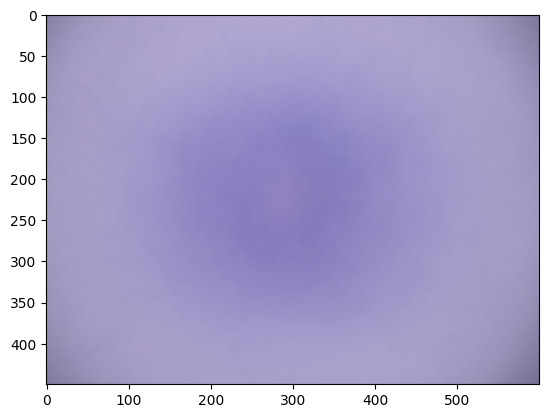

In [56]:
plt.imshow(df_mean/256)

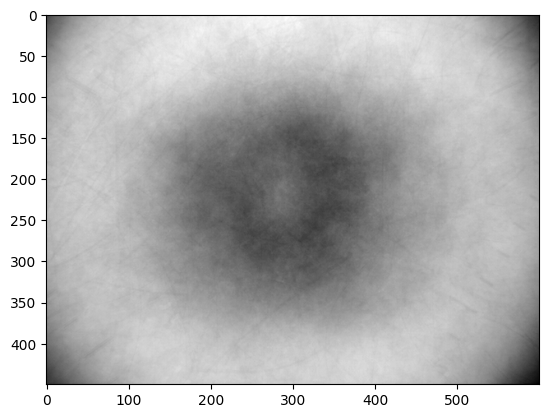

In [58]:
plt.imshow(df_mean[:,:,0], cmap='gray')

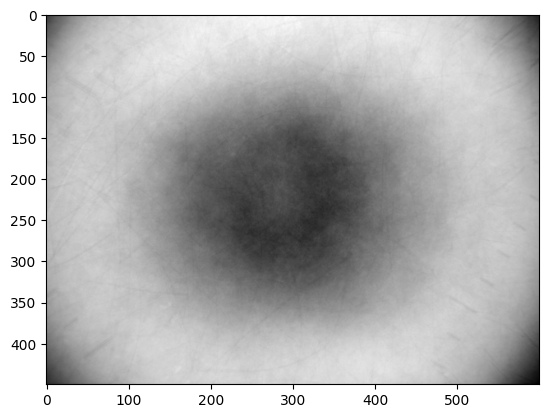

In [59]:
plt.imshow(df_mean[:,:,1], cmap='gray')

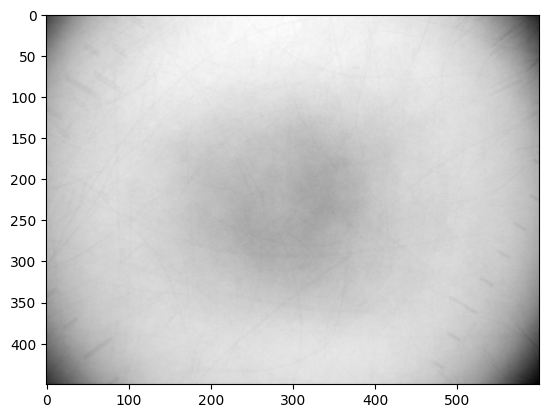

In [60]:
plt.imshow(df_mean[:,:,2], cmap='gray')

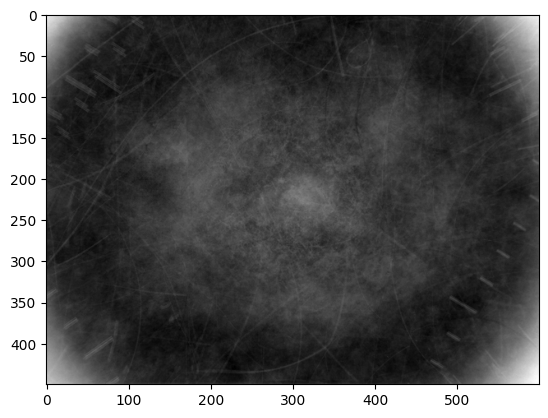

In [67]:
plt.imshow((((df_var)**0.5)/256)[:,:,0], cmap="gray")

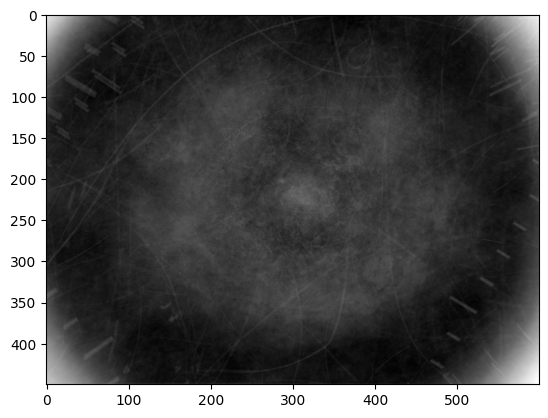

In [68]:
plt.imshow((((df_var)**0.5)/256)[:,:,1], cmap="gray")

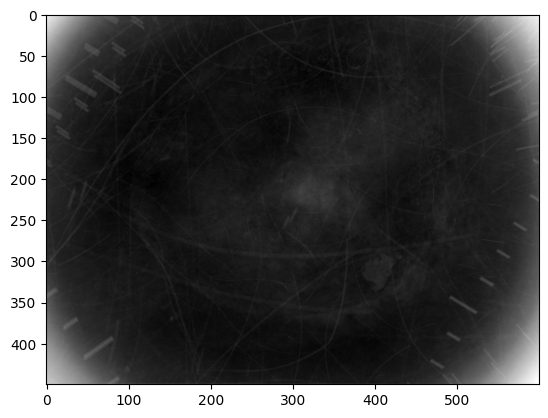

In [69]:
plt.imshow((((df_var)**0.5)/256)[:,:,2], cmap="gray")

In [74]:
vasc_mean, vasc_var =compute_all2(vasc_names)

100%|█████████████████████████████████████████| 142/142 [00:01<00:00, 97.29it/s]


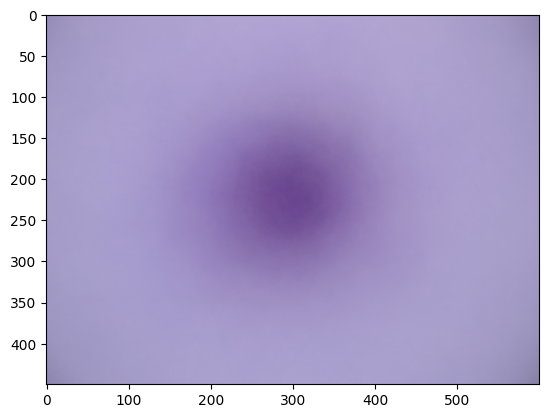

In [75]:
plt.imshow(vasc_mean/256)

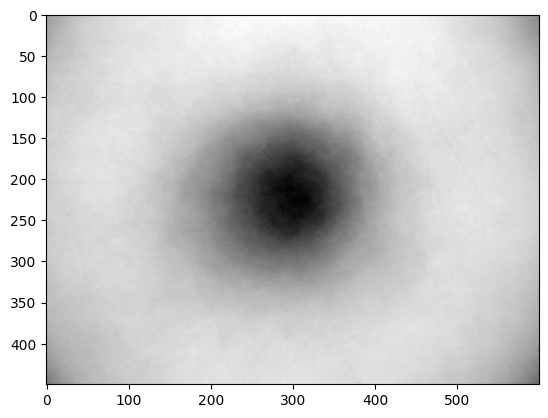

In [76]:
plt.imshow(vasc_mean[:,:,0], cmap='gray')

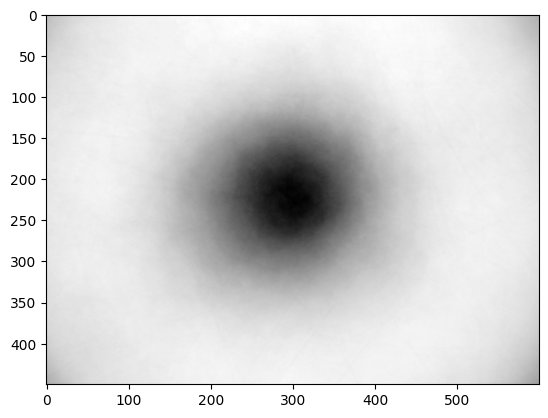

In [78]:
plt.imshow(vasc_mean[:,:,1], cmap='gray')

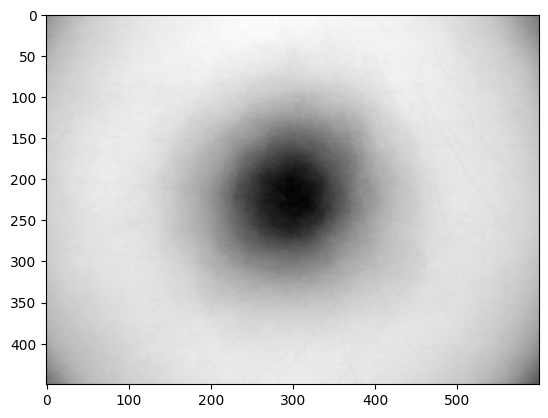

In [79]:
plt.imshow(vasc_mean[:,:,2], cmap='gray')

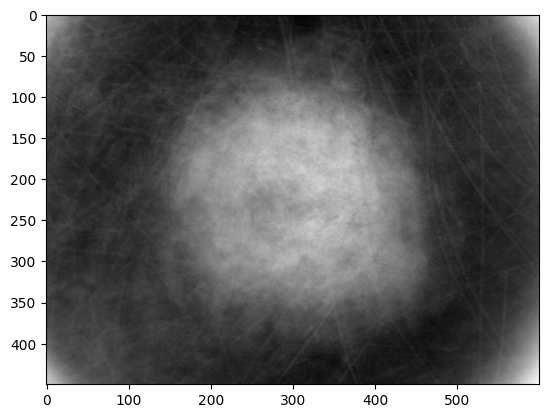

In [80]:
plt.imshow((((vasc_var)**0.5)/256)[:,:,0], cmap="gray")

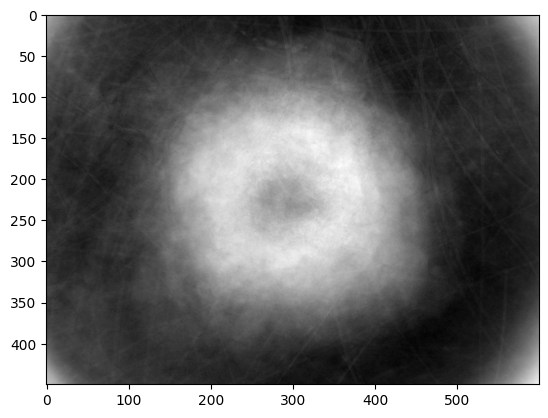

In [81]:
plt.imshow((((vasc_var)**0.5)/256)[:,:,1], cmap="gray")

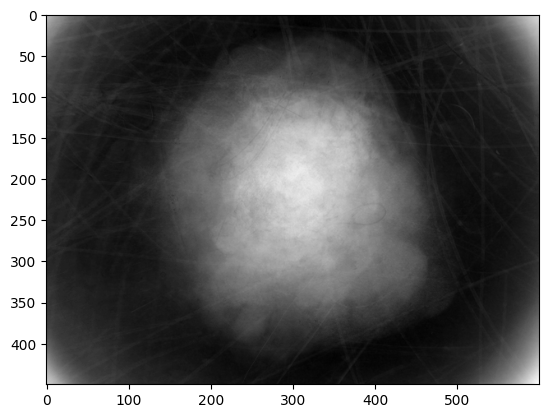

In [82]:
plt.imshow((((vasc_var)**0.5)/256)[:,:,2], cmap="gray")

In [11]:
def count_pixels(names):
    count=np.zeros((256,3), dtype=int)
    for name in tqdm(names):
        new_image = cv.imread("pictures/" + name + ".jpg").astype(int) 
        for color in range(3):
            unique, counts = np.unique(new_image[:,:,color], return_counts= True)
            for i, val in enumerate(unique):
                count[val, color]+=counts[i]
    return count/len(names)


In [12]:
df_count =count_pixels(df_names)
vasc_count = count_pixels(vasc_names)

100%|█████████████████████████████████████████| 142/142 [00:03<00:00, 35.74it/s]


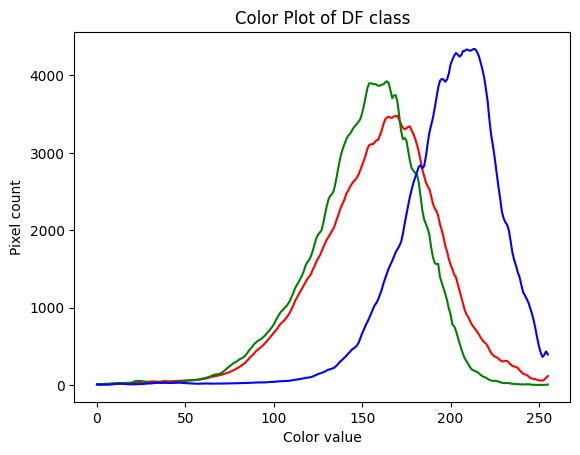

In [16]:
colors =['Red', 'Green', 'Blue']
x = np.arange(256)
for channel_id, color in enumerate(colors):
        plt.plot(x, df_count[:,channel_id], color=color)
        plt.title(f"Color Plot of DF class")
        plt.xlabel("Color value")
        plt.ylabel("Pixel count")
plt.savefig(f"DF_distribution.png")

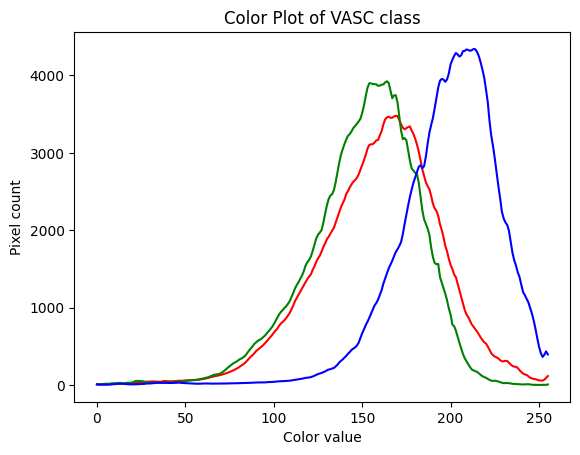

In [17]:
colors =['Red', 'Green', 'Blue']
x = np.arange(256)
for channel_id, color in enumerate(colors):
        plt.plot(x, df_count[:,channel_id], color=color)
        plt.title(f"Color Plot of VASC class")
        plt.xlabel("Color value")
        plt.ylabel("Pixel count")
plt.savefig(f"VASC_distribution.png")